In [1]:
%cd C:\\Users\\charl\\OneDrive\\Desktop\\ipynb
import charlie_calc as dist_c

%pwd
!python --version

import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import scipy.sparse
import os
import sys
import pymbar
import numpy as np
import pandas as pd
import seaborn as sns
import random
from array import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\charl\OneDrive\Desktop\ipynb
Python 3.12.2


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


In [2]:
# Folder path where your CSV files are located
folder_path = r'C:\Users\charl\OneDrive\Desktop\PIEZO LAMMPS\Kc'

# List to store individual DataFrames
dataframes = []

start_line = 30

custom_header = ["q","Sq","N","StdDev (S_q)","StdErr (S_q)"]

# Loop through files in the folder (now with looking for files in subfolders)
for root, _, files in os.walk(folder_path):
    for filename in files:
#         if filename.endswith('press'):  # Change this if your files have a different extension
        # if 'spectrum.modified.txt' in filename:
        if '' in filename:
            file_path = os.path.join(root, filename)
            # Read CSV file into a DataFrame
            with open(file_path, 'r') as file:
                for _ in range(start_line - 1):
                    next(file)
                # Use pandas to read the remaining lines into a DataFrame
                df = pd.read_csv(file, delim_whitespace=True, header=None, names=custom_header)

            # Add a new column 'simName' containing the filename
            df['simName'] = file_path.split('\\')[-1]

            # Append the DataFrame to the list
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
simData = pd.concat(dataframes, ignore_index=False)

C:\Users\charl\AppData\Local\Temp\ipykernel_22716\2233542128.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=custom_header)
C:\Users\charl\AppData\Local\Temp\ipykernel_22716\2233542128.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=custom_header)
C:\Users\charl\AppData\Local\Temp\ipykernel_22716\2233542128.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=custom_header)
C:\Users\charl\AppData\Local\Temp\ipykernel_22716\2233542128.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read

In [3]:
simData

,q,Sq,N,StdDev (S_q),StdErr (S_q),simName
0,0.075,4289.181000,2406,7921.599000,161.497200,spectrum.modified.txt
1,0.125,118.344600,4002,179.056700,2.830427,spectrum.modified.txt
2,0.175,23.363780,4814,25.569850,0.368532,spectrum.modified.txt
3,0.225,7.741913,5616,8.089370,0.107945,spectrum.modified.txt
4,0.275,3.271491,7210,3.335849,0.039286,spectrum.modified.txt
...,...,...,...,...,...,...
10,0.575,0.234709,8412,0.239542,0.002612,3.txt
11,0.625,0.210464,4907,0.207734,0.002966,3.txt
12,0.675,0.196283,4907,0.197089,0.002814,3.txt
13,0.725,0.192523,1402,0.204102,0.005451,3.txt


In [5]:
def custom_equation(x, a):
    return a * np.power(x, -4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


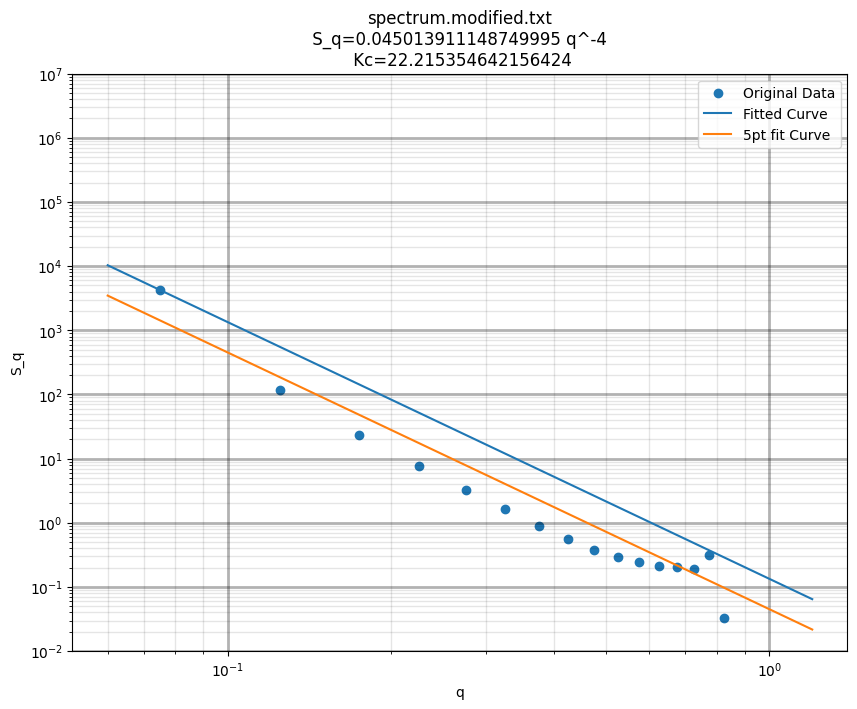

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


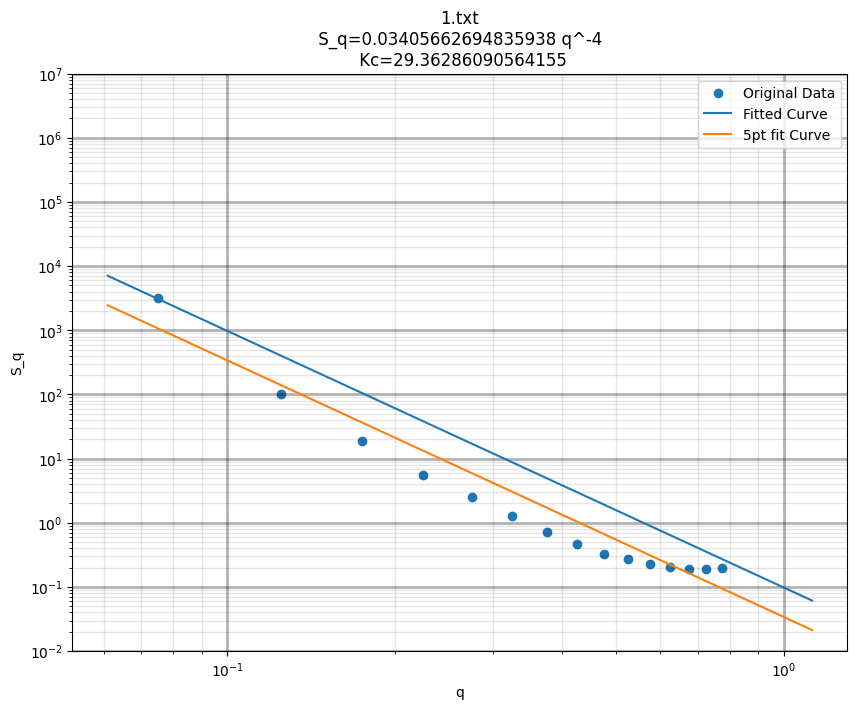

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


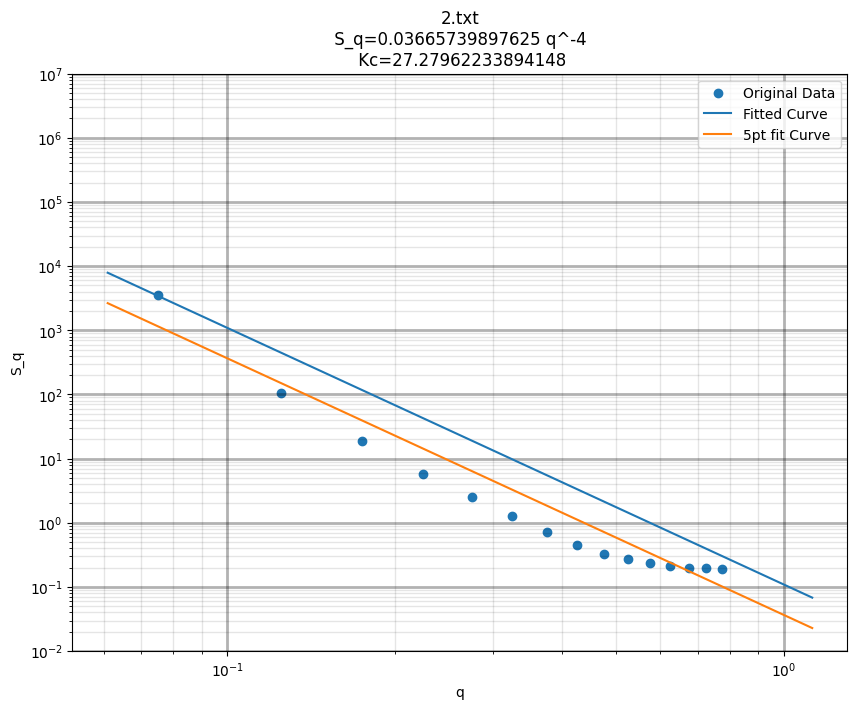

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


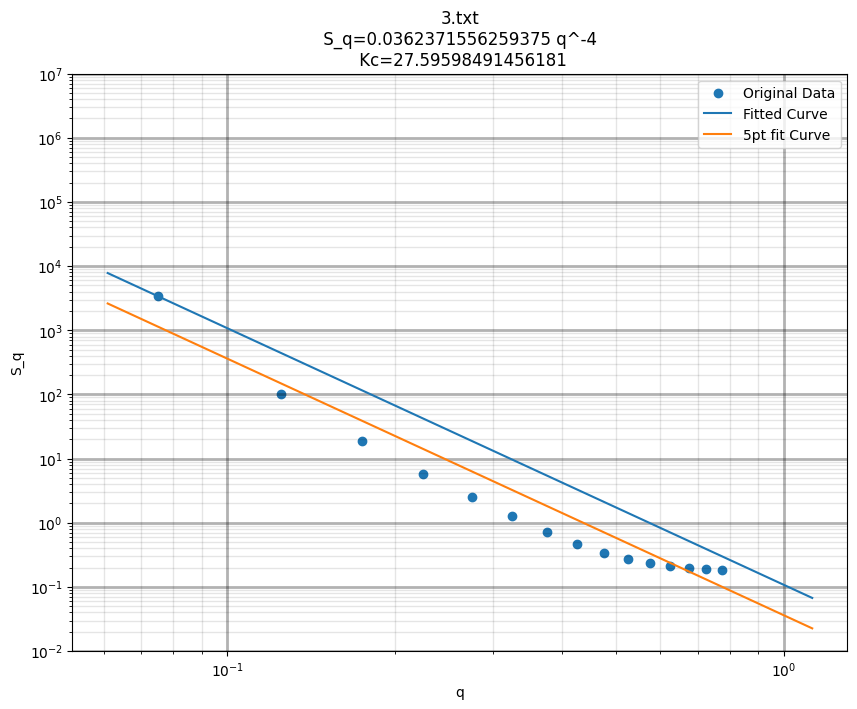

In [6]:
kc=[]
for cnt,simName in enumerate(simData['simName'].unique()):
    ###############
    a4_dims = (10, 7.5)
    widths = [1]
    heights = [1]
    fig, axs = plt.subplots(ncols=1, nrows=1, sharex=False,sharey=True,squeeze=True,figsize=a4_dims,gridspec_kw=dict(width_ratios=widths,height_ratios=heights))
    axs.legend(bbox_to_anchor=(0.5,0.5,0.5,0.5), loc='best', borderaxespad=1,fontsize='medium')#title='simName',title_fontsize='small')
    ###Plot grid
    axs.minorticks_on()
    axs.grid(color="black", alpha=0.3, which='major', linestyle='-', linewidth=2)
    axs.grid(color="black", alpha=0.1, which='minor', linestyle='-', linewidth=1)
    ###############
    try:
        # Perform curve fitting
        x_data=simData.query('simName=="{name}"'.format(name=simName))['q']
        y_data=simData.query('simName=="{name}"'.format(name=simName))['Sq']
        a_5pt=0
        for i in range(5):
            a_5pt+=(x_data[i]**4)*y_data[i]
        a_5pt=a_5pt/5
        params, _ = curve_fit(custom_equation, x_data[:5], y_data[:5])
        # Extract the fitted parameters
        a_fit = params
        # Generate data points using the fitted equation
        extension=(x_data.max()-x_data.min())/10
        x_fit = np.linspace(x_data.min()-extension/5, x_data.max()+extension*5, 500)
        y_fit = custom_equation(x_fit, a_fit)
        y_5pt = custom_equation(x_fit, a_5pt)
        # Plot the original data and fitted curve
        plt.scatter(x_data,y_data,label='Original Data')
        plt.loglog(x_fit, y_fit, label='Fitted Curve')
        plt.loglog(x_fit, y_5pt, label='5pt fit Curve')
        axs.set_ylim(10e-3,10e6)
        plt.legend()
        plt.xlabel('q')
        plt.ylabel('S_q')
        plt.title("{simName}\n S_q={afit} q^-4 \n Kc={kc}".format(simName=simName,afit=a_5pt,kc=1/a_5pt))
        plt.savefig('{simName}.png'.format(simName=simName))
        plt.show()
    except RuntimeError as e:
        print("RuntimeError occurred:", str(e))
        continue
    kc.append(1/a_5pt.item())

In [10]:
kc

[16.78693175420064,
 18.036551577895153,
 30.044720642331498,
 27.378595100478382,
 26.04731200443264,
 18.729147852346152]